In [6]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import haversine as hs
#import missingno as msno
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#%matplotlib inline
#inline_rc = dict(mpl.rcParams)
from sklearn.neighbors import BallTree
import time

# Loading JSON

## My Methods

In [7]:
def isRestaurant(categories):
    category_list = categories.split(', ')
    forbidden_categories = {"Grocery", "Gas Stations", "Event Planning & Services", "Caterers",
                           "Health Markets", "Bars","Bookstores","Nightlife", "Bakeries","Food Delivery Services",
                            "Convenience Stores","Arts & Entertainment","Shopping" }

    if "Restaurants" in category_list and not set(category_list).intersection(forbidden_categories):
        return True
    else:
        return False

In [8]:
def isFastFood(string):
    food_items = ["Fast Food", "Pizza", "Burgers"]
    for item in food_items:
        if item in string:
            return 1
    return 0

# Loading data from JSON

In [9]:
#json file se data import krke data frame mai jata hai idr 
users = []
with open('./yelp_academic_dataset_business.json', encoding = 'cp850') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
df = pd.DataFrame(users)

In [10]:
#json file se data import krke data frame mai jata hai idr 
users = []
with open('./yelp_academic_dataset_checkin.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
dfChkIn = pd.DataFrame(users)
#dfChkIn.sample

# Preprocessing

## Filtering Data Based on City and Review Count

In [11]:
#Filter out based on city and review count
city="All"
radius = 2 #to define radius in kilometers of surrounding businesses
reviewCountTheshold = 0


df2 = df[(df.review_count >= reviewCountTheshold) & (df.is_open == 1)]
#df2 = df[(df.review_count >= reviewCountTheshold) & (df.city==city) & (df.is_open == 1)]
            
#deleting businesses with no category
df2 = df2.dropna(subset=['categories']).copy()

df2.to_csv('data.csv', index=False)

df2.describe()
df2 = df2.reset_index()

#### Calculating Checkin

In [12]:
restaurants_df = df2[df2['categories'].apply(lambda x: isRestaurant(x))]

In [13]:
'''
from collections import Counter

# Split categories and count occurrences
category_counts = Counter(restaurants_df['categories'].str.split(', ').explode())

# Sort categories by count in descending order
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

# Print category count
for category, count in sorted_categories:
    print(f"{category}: {count}")
    
    '''

'\nfrom collections import Counter\n\n# Split categories and count occurrences\ncategory_counts = Counter(restaurants_df[\'categories\'].str.split(\', \').explode())\n\n# Sort categories by count in descending order\nsorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)\n\n# Print category count\nfor category, count in sorted_categories:\n    print(f"{category}: {count}")\n    \n    '

In [14]:
# define a lambda function to count the number of dates in a row, or return 0 if no dates available
count_dates = lambda row: len(row["date"].split(", ")) if row["date"] else 0

# create a new column with the count of dates in each row
dfChkIn["num_checkins"] = dfChkIn.apply(count_dates, axis=1)

# Perform the merge based on 'business_id'
df2 = df2.merge(dfChkIn[['business_id', 'num_checkins']], on='business_id', how='left')

In [15]:
#fill empty checkins with 0
df2['num_checkins'].fillna(0, inplace=True)

### Statistics

C:\Users\Mughees\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Star Ratings ')

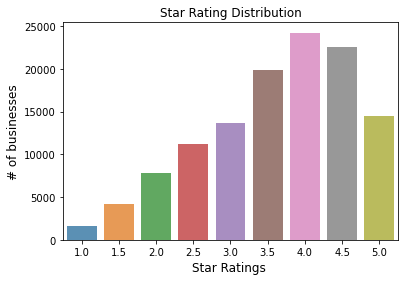

In [16]:
x=df2['stars'].value_counts()
#x=x.sort_index()
#plot
#plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

C:\Users\Mughees\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Star Ratings ')

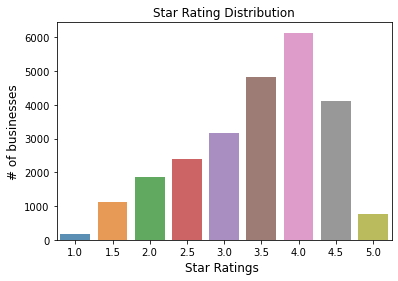

In [17]:
x=restaurants_df['stars'].value_counts()
#x=x.sort_index()
#plot
#plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

C:\Users\Mughees\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


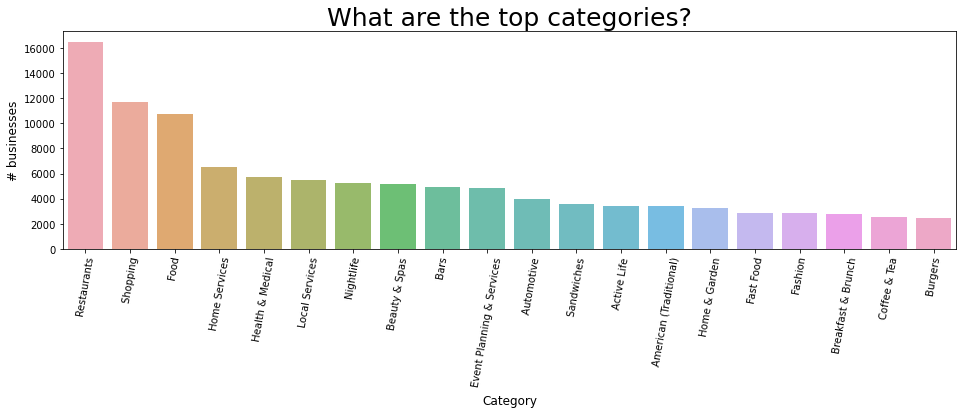

In [18]:
business_cats = ''.join(df2['categories'].astype('str'))

cats=pd.DataFrame(business_cats.split(','),columns=['categories'])

#prep for chart
x=cats.categories.value_counts()

x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
# rects = ax.patches
# labels = x.values
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [19]:
# Measures of central tendency for given data
df2.describe()

,index,latitude,longitude,stars,review_count,is_open,num_checkins
count,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.0,119603.000000
mean,75147.747247,36.621838,-89.466463,3.620114,46.715935,1.0,92.329515
std,43409.224509,5.884550,14.972558,0.995082,130.867275,0.0,430.209605
min,1.000000,27.555127,-120.095137,1.000000,5.000000,1.0,0.000000
25%,37552.500000,32.156002,-90.375455,3.000000,8.000000,1.0,2.000000
50%,75104.000000,38.766652,-86.118520,4.000000,15.000000,1.0,13.000000
75%,112777.500000,39.954785,-75.458074,4.500000,37.000000,1.0,56.000000
max,150345.000000,53.679197,-73.200457,5.000000,7568.000000,1.0,52144.000000


C:\Users\Mughees\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'City')

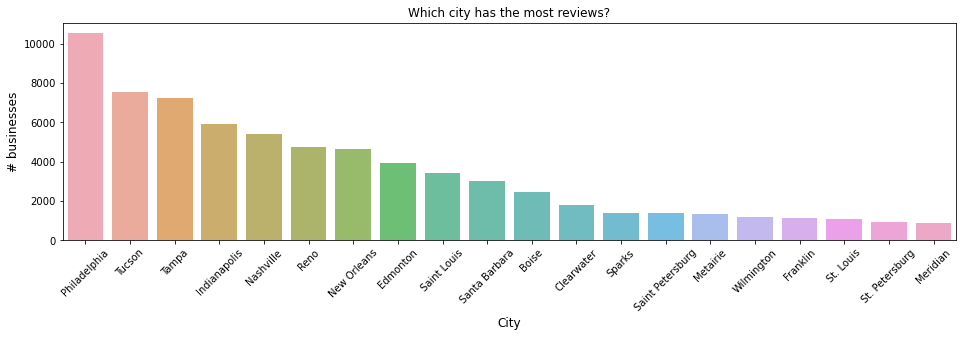

In [20]:
#Get the distribution of the ratings
x=df2['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

In [21]:
#counts top attributes of all businesses in the dataframe
from collections import Counter

# Assuming you already have a DataFrame named 'df2'
attributes_counter = Counter()

# Iterate over each row in the 'attributes' column
for row in restaurants_df['attributes']:
    if isinstance(row, dict):
        attributes_counter.update(row.keys())

# Get the top 10 attributes with the highest frequency
top_attributes = attributes_counter.most_common(20)

# Print the top attributes
for attribute, frequency in top_attributes:
    print(f"{attribute}: {frequency}", int (frequency / len(restaurants_df) * 100) + 4, "%")

RestaurantsTakeOut: 23251 98 %
RestaurantsDelivery: 22875 97 %
BusinessParking: 20635 87 %
BusinessAcceptsCreditCards: 20433 87 %
RestaurantsPriceRange2: 20050 85 %
RestaurantsReservations: 19852 84 %
OutdoorSeating: 19786 84 %
HasTV: 19464 83 %
Ambience: 19368 82 %
RestaurantsGoodForGroups: 18737 80 %
GoodForKids: 18583 79 %
Alcohol: 17663 75 %
WiFi: 17524 75 %
RestaurantsAttire: 17436 74 %
BikeParking: 16935 72 %
Caters: 16158 69 %
NoiseLevel: 15331 66 %
GoodForMeal: 15041 65 %
RestaurantsTableService: 9636 43 %
WheelchairAccessible: 6070 28 %


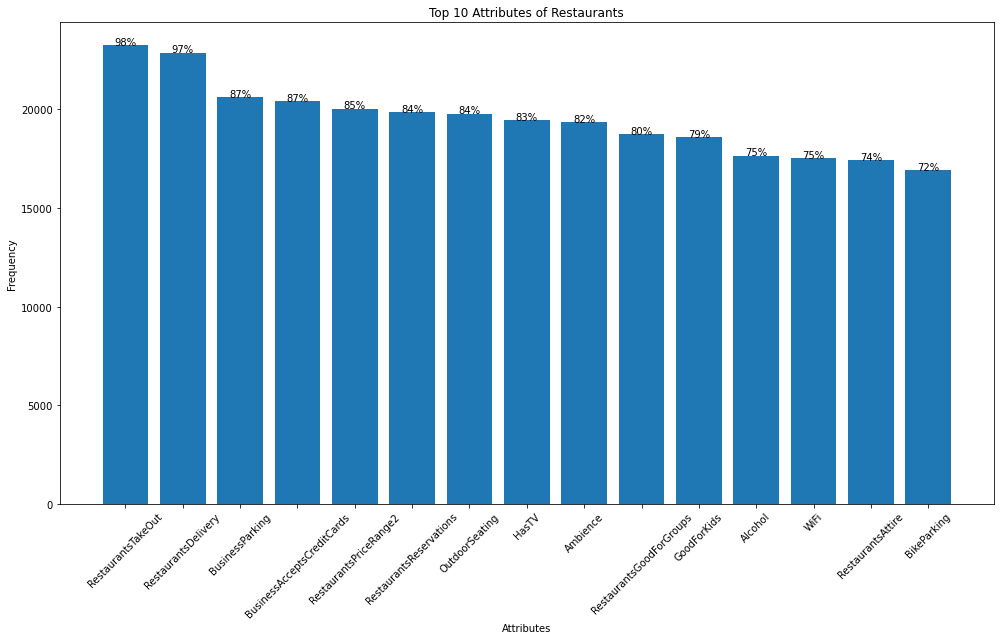

In [22]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming you already have a DataFrame named 'df2'
attributes_counter = Counter()

# Iterate over each row in the 'attributes' column
for row in restaurants_df['attributes']:
    if isinstance(row, dict):
        attributes_counter.update(row.keys())

# Get the top 10 attributes with the highest frequency
top_attributes = attributes_counter.most_common(15)

# Extract attribute names and frequencies
attributes = [attr for attr, _ in top_attributes]
frequencies = [freq for _, freq in top_attributes]

# Set the figure size
plt.figure(figsize=(14, 9))

# Create a bar plot
plt.bar(attributes, frequencies)

# Add labels and title
plt.xlabel('Attributes')
plt.ylabel('Frequency')
plt.title('Top 10 Attributes of Restaurants')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the percentage values above each bar
for i, v in enumerate(frequencies):
    percentage = int(v / len(restaurants_df) * 100) + 4
    plt.text(i, v + 4, f"{percentage}%", ha='center')

# Show the plot
plt.tight_layout()
plt.show()


## Constructing BallTree

In [23]:
# convert latitude and longitude to radians
lat_rad = np.deg2rad(df2['latitude'].values)
long_rad = np.deg2rad(df2['longitude'].values)
X = np.column_stack((lat_rad, long_rad))

# create a BallTree object using the radian coordinates
tree = BallTree(X, leaf_size=15, metric='haversine')

#### Defining Radius of BellTree

In [24]:
# convert radius from km to radians
earth_radius_km = 6371.0088  # mean radius of the earth in km
r_rad = radius / earth_radius_km  # radius in radians

In [25]:
# convert latitude and longitude to radians
lat_rad = np.deg2rad(df2['latitude'].values)
long_rad = np.deg2rad(df2['longitude'].values)
X = np.column_stack((lat_rad, long_rad))

# create a BallTree object using the radian coordinates
tree = BallTree(X, leaf_size=15, metric='haversine')

neighborsIndexes = tree.query_radius(X, r=r_rad)

In [26]:
#this functions returns true if the given business string is a cinema, art AND is not a restaurant itself
def isEntertainment(string):
    food_items = ["Shopping", "Beauty & Spas", "Arts & Entertainment", "Cinema"]
    for item in food_items:
        if item in string:
            return 1
    return 0

### Attribute Extraction Functions

In [27]:
df2_restaurants = df2[df2["categories"].apply(lambda x: isRestaurant(x))]
df2_restaurants.to_csv('restaurants.csv', index=False)

In [28]:
def extract_credit_card_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
        
    if 'BusinessAcceptsCreditCards' in attributes:
                
        value = attributes['BusinessAcceptsCreditCards']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [29]:
def extract_RestaurantsTakeOut_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'RestaurantsTakeOut' in attributes:
                
        value = attributes['RestaurantsTakeOut']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [30]:
def extract_RestaurantsDelivery_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'RestaurantsDelivery' in attributes:
                
        value = attributes['RestaurantsDelivery']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [31]:
def extract_OutdoorSeating_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'OutdoorSeating' in attributes:
                
        value = attributes['OutdoorSeating']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [32]:
def extract_RestaurantsPriceRange2_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'RestaurantsPriceRange2' in attributes:  
        value = attributes['RestaurantsPriceRange2']
        if value == 'None':
            return -1
        else:
            return int(value)
    else:
        return -1

In [33]:
def extract_RestaurantsReservations_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'RestaurantsReservations' in attributes:
                
        value = attributes['RestaurantsReservations']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [34]:
def extract_HasTV_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'HasTV' in attributes:
                
        value = attributes['HasTV']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [35]:
def extract_RestaurantsGoodForGroups_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'RestaurantsGoodForGroups' in attributes:
                
        value = attributes['RestaurantsGoodForGroups']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [36]:
def extract_GoodForKids_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    
    if 'GoodForKids' in attributes:
                
        value = attributes['GoodForKids']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [37]:
def extract_BikeParking_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        return -1
    
    if 'BikeParking' in attributes:
                
        value = attributes['BikeParking']
        if value == 'True':
            return 1
        elif value == 'False' or value == 'None':
            return 0
    else:
        return -1

In [38]:
def extract_parking_attribute_value(row):
    attributes = row['attributes']
    if pd.isnull(attributes) or not attributes:
        return -1
    
    if 'BusinessParking' in attributes:
        value = attributes['BusinessParking']
        count = value.count("True")
        if count>=1:
            return 1
        return count
    else:
        return -1

In [39]:
#returns 0 for no wifi, -1 for non-existent attribute, 1 for free and 2 for paid

def extract_NoiseLevel_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    if 'NoiseLevel' in attributes:
        value = attributes['NoiseLevel']
        if value == 'u\'quiet\'':
            return 0
        elif value == 'u\'average\'' or value == 'u\'free\'':
            return 1
        elif value == 'u\'very_loud\'' or value == '\'loud\'':
            return 2
        else:
            return -1
    else:
        return -1

In [40]:
#returns 0 for no wifi, -1 for non-existent attribute, 1 for free and 2 for paid

def extract_WiFi_attribute_value(row):
    attributes = row['attributes']
    
    if pd.isnull(attributes) or not attributes:
        #print(-1)
        return -1
    if 'WiFi' in attributes:
        value = attributes['WiFi']
        if value == 'u\'no\'' or value == '\'no\'' or value == 'None':
            return 0
        elif value == '\'free\'' or value == 'u\'free\'':
            return 1
        elif value == '\'paid\'' or value == 'u\'paid\'':
            return 1
    else:
        return -1

In [41]:
def calculate_weight(distance, power=2):
    return 1 / (distance ** power)

### Add Binary Attributes to Dataframe DF2

In [42]:
df2['Parking'] = df2.apply(extract_parking_attribute_value, axis=1)
df2['BusinessAcceptsCreditCards'] = df2.apply(extract_credit_card_attribute_value, axis=1)
df2['RestaurantsTakeOut'] = df2.apply(extract_RestaurantsTakeOut_attribute_value, axis=1)
df2['RestaurantsDelivery'] = df2.apply(extract_RestaurantsDelivery_attribute_value, axis=1)
df2['OutdoorSeating'] = df2.apply(extract_OutdoorSeating_attribute_value, axis=1)
df2['RestaurantsPriceRange2'] = df2.apply(extract_RestaurantsPriceRange2_attribute_value, axis=1)
df2['RestaurantsReservations'] = df2.apply(extract_RestaurantsReservations_attribute_value, axis=1)
df2['HasTV'] = df2.apply(extract_HasTV_attribute_value, axis=1)
df2['RestaurantsGoodForGroups'] = df2.apply(extract_RestaurantsGoodForGroups_attribute_value, axis=1)
df2['GoodForKids'] = df2.apply(extract_GoodForKids_attribute_value, axis=1)
df2['BikeParking'] = df2.apply(extract_BikeParking_attribute_value, axis=1)
df2['WiFi'] = df2.apply(extract_WiFi_attribute_value, axis=1)
df2['NoiseLevel'] = df2.apply(extract_NoiseLevel_attribute_value, axis=1)

#df2.to_csv('rest.csv',index=False)

### Attribute Imputation

#### Mode Imputation for Binary Data

df2['BusinessAcceptsCreditCards'].replace(-1, df2['BusinessAcceptsCreditCards'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['RestaurantsTakeOut'].replace(-1, df2['RestaurantsTakeOut'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['RestaurantsDelivery'].replace(-1, df2['RestaurantsDelivery'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['OutdoorSeating'].replace(-1, df2['OutdoorSeating'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['RestaurantsReservations'].replace(-1, df2['RestaurantsReservations'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['HasTV'].replace(-1, df2['HasTV'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['RestaurantsGoodForGroups'].replace(-1, df2['RestaurantsGoodForGroups'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['GoodForKids'].replace(-1, df2['GoodForKids'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
df2['BikeParking'].replace(-1, df2['BikeParking'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called 'df' with latitude and longitude columns

# Preprocess the data
X = df2[['latitude', 'longitude']].values
#X = StandardScaler().fit_transform(X)

# Apply DBSCAN
epsilon = 0.01 # The maximum distance between two samples to be considered as neighbors
min_samples = 10  # The minimum number of samples in a neighborhood to form a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Print the cluster labels
print(labels)

df2['dbscan_cluster_label'] = labels


# Count the number of clusters (excluding noise points)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Count the number of noise points
num_noise_points = list(labels).count(-1)

# Print the number of clusters and noise points
print("Number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)

#### Median Imputation for Integer Data

# Assuming the dataframe is named 'df2' and the feature is named 'RestaurantsPriceRange2'
median_value = df2['RestaurantsPriceRange2'][df2['RestaurantsPriceRange2'] != -1].median()  # Calculate the median value, excluding -1
df2['RestaurantsPriceRange2'].replace(-1, median_value, inplace=True)  # Replace -1 with the median value

median_value = df2['WiFi'][df2['WiFi'] != -1].median()  # Calculate the median value, excluding -1
df2['WiFi'].replace(-1, median_value, inplace=True)  # Replace -1 with the median value

In [43]:
print(df2.shape)
#df2.to_csv('rest.csv',index=False)

(119603, 29)


# Business Profile Generation

#### New Code

In [45]:
# Record the start time
start_time = time.time()

#main code, extracting features from businesses
#outer loop to iterate through samples
i=-1

finalDF = pd.DataFrame()

ratingHigh=4
ratingMid=3

for row in df2.itertuples():
    i = i+1
    
    #only take restaurants/food category in dataset
    if not isRestaurant(getattr(row,'categories')):
        continue
    
    reviewCountSameCat=0
    reviewCountDiffCat=0
    #reset variables
    ratingClass='Mid'
    
    cummulativeCheckinDifferent=0
    cummulativeCheckinSame=0
    businessCount, ratingSum, ratingAvg, maxRating, minRating = 0, 0, 0, 0, 5
    sameBusinessCount, ratingSumSameCat, ratingAvgSameCat, maxRatingSameCat, minRatingSameCat = 0, 0, 0, 0, 5
    
    EntertainmentCount=0
    
    CompetitorCount=0
    OtherFoodCount=0
    
    highRatedCountSameCat=0
    midRatedCountSameCat=0
    lowRatedCountSameCat=0
    
    highRatedCountDiffCat=0
    midRatedCountDiffCat=0
    lowRatedCountDiffCat=0
    
    sameCatrating=[]
    diffCatrating=[]
    
    standardDeviationSameCat=0
    standardDeviationDiffCat=0
    
    weighted_sum_SameCat = 0
    total_weight_SameCat = 0
    
    weighted_sum_DiffCat = 0
    total_weight_DiffCat = 0
    
    weighted_sum_SameSubCat = 0
    total_weight_SameSubCat = 0
      
    #begin fetching data
    loc1 = (getattr(row,'latitude'), getattr(row,'longitude'))
    
    ################################ b tree ####################################################
    
    # Extract rows based on index values, neighborBusinesses is now a newdataframe of just current neighbors
    neighborBusinesses = df2.loc[neighborsIndexes[i]]
    
    ############################################################################################
    
    #inner loop to iterate and find distance with other businesses, other businesses are row2
    for row2 in neighborBusinesses.itertuples():
        
        loc2 = (getattr(row2,'latitude'), getattr(row2,'longitude'))
        
        #if its the same business, then no point in calculating, move on
        if loc1 == loc2:
            continue
        
        distance = hs.haversine(loc1,loc2)
        
        #if distance < radius:
        #print('Distance from',getattr(row,'name'),' to ', getattr(row2,'name'), ' is: ', distance*1000)
        
        #code to do when business comes under the radius and reviewCount given number se bra ho, so that the rating 
        #is mature enough, yahan pe business profile k features pkr k rkho

        ############################ same category if starts ######################################
        
        if isRestaurant(getattr(row2,'categories')):
        #if isSameCategory(getattr(row,'categories'), getattr(row2,'categories')):
            
            reviewCountSameCat = reviewCountSameCat +  getattr(row2, 'review_count')
            
            # Calculate the weight based on the distance
            weight = calculate_weight(distance)

            # Accumulate the weighted sum and total weight
            weighted_sum_SameCat += getattr(row2, 'stars') * weight
            total_weight_SameCat += weight
            
            ####################################################
            
            if isFastFood(getattr(row, 'categories')):
                #bhr wala fast food ka hai
                if isFastFood(getattr(row2, 'categories')):
                    #aur andr wala bhi fast food ka hai
                    #both are same category
                     # Accumulate the weighted sum and total weight
                    weighted_sum_SameSubCat += getattr(row2, 'stars') * weight
                    total_weight_SameSubCat += weight
                    
                    CompetitorCount = CompetitorCount + 1
                else:
                    #magar andr wala fast food ka nahin hai
                    OtherFoodCount = OtherFoodCount + 1
            else:
                #bhr wala fast food ka nahin hai
                if isFastFood(getattr(row2, 'categories')):
                    #magar andr wala fast food ka hai
                    OtherFoodCount = OtherFoodCount + 1
                else:
                    #bhr aur andr walay dono fast food k ni hain
                    weighted_sum_SameSubCat += getattr(row2, 'stars') * weight
                    total_weight_SameSubCat += weight
                    
                    CompetitorCount = CompetitorCount + 1
            
            ####################################################

            sameBusinessCount = sameBusinessCount+1
            ratingSumSameCat = ratingSumSameCat + getattr(row2,'stars')

            if maxRatingSameCat < getattr(row2,'stars'):
                maxRatingSameCat = getattr(row2,'stars')

            if minRatingSameCat > getattr(row2,'stars'):
                minRatingSameCat = getattr(row2,'stars')
                
            cummulativeCheckinSame = cummulativeCheckinSame + getattr(row2,'num_checkins')

            if getattr(row2,'stars') >= ratingHigh:
                highRatedCountSameCat=highRatedCountSameCat+1
            elif getattr(row2,'stars') >= ratingMid:
                midRatedCountSameCat=midRatedCountSameCat+1
            else:
                lowRatedCountSameCat=lowRatedCountSameCat+1 

            sameCatrating.append(getattr(row2,'stars'))

        ############################## different category else ends #################################

        else:
            
            if isEntertainment(getattr(row2,'categories')):
                EntertainmentCount = EntertainmentCount + 1
            
            reviewCountDiffCat = reviewCountDiffCat +  getattr(row2, 'review_count')
            
            # Calculate the weight based on the distance
            weight = calculate_weight(distance)

            # Accumulate the weighted sum and total weight
            weighted_sum_DiffCat += getattr(row2, 'stars') * weight
            total_weight_DiffCat += weight

            businessCount = businessCount + 1 #incrementing business count, since its in the given radius
            ratingSum=ratingSum+(getattr(row2,'stars'))

            #update max rating                                  
            if maxRating==0:
                maxRating=getattr(row2,'stars')
            elif (maxRating < getattr(row2,'stars')):
                maxRating=getattr(row2,'stars')

            #update minimum rating                                      
            if getattr(row2,'stars') < minRating:
                minRating = getattr(row2, 'stars')
                        
            cummulativeCheckinDifferent = cummulativeCheckinDifferent + getattr(row2,'num_checkins')
            
            if getattr(row2,'stars') >= ratingHigh:
                highRatedCountDiffCat=highRatedCountDiffCat+1
            elif getattr(row2,'stars') >= ratingMid:
                midRatedCountDiffCat=midRatedCountDiffCat+1
            else:
                lowRatedCountDiffCat=lowRatedCountDiffCat+1 

            diffCatrating.append(getattr(row2,'stars'))

        ############################## else ends #######################################    
                
            
        #inner for ends
    
    #print stats 
       
    #set class to businesses' ratings
    if (getattr(row, 'stars')>=ratingHigh):
        ratingClass=2
    elif (getattr(row, 'stars')>=ratingMid):
        ratingClass=1
    else:
        ratingClass=0
    
    ########## fix min ratings ##############
    
    if businessCount==0:
        continue
        minRating=0
        
    if sameBusinessCount==0:
        continue
        minRatingSameCat=0
     
    #print(diffCatrating)
    standardDeviationDiffCat = np.std(diffCatrating)
    standardDeviationSameCat = np.std(sameCatrating)
    
    
    if businessCount!=0:
        ratingAvg=ratingSum/businessCount    
    
    if sameBusinessCount!=0:
        ratingAvgSameCat=ratingSumSameCat/sameBusinessCount
    
    weighted_mean_SameCat = weighted_sum_SameCat / total_weight_SameCat if total_weight_SameCat > 0 else 0
    
    weighted_mean_DiffCat = weighted_sum_DiffCat / total_weight_DiffCat if total_weight_DiffCat > 0 else 0
    
    weighted_mean_SameSubCat = weighted_sum_SameSubCat / total_weight_SameSubCat if total_weight_SameSubCat > 0 else 0
    
    ################################# saving data from frame ##############################################

   # Append the variables to the dataframe
    new_row = {'Business Name': getattr(row, 'name'),
               'Business Rating': getattr(row, 'stars'),
               'Rating Class': ratingClass,
               'FoodSubCategory': isFastFood(getattr(row, 'categories')),
               'Business Count, Different Category Businesses': businessCount,
               'Average Rating, Different Category Businesses': ratingAvg,
               'Max Rating, Different Category Businesses': maxRating,
               'Min Rating, Different Category Businesses': minRating,
               'Footfall In Different Category': int(cummulativeCheckinDifferent),
               'Business Count, Same Category': sameBusinessCount,
               'Footfall In Same Category': int(cummulativeCheckinSame),
               'Average Rating, Same Category Businesses': ratingAvgSameCat,
               'Max Rating, Same Category Businesses': maxRatingSameCat,
               'Min Rating, Same Category Businesses': minRatingSameCat,
              'High Rated Businesses Count Same Category':highRatedCountSameCat,
              'Mid Rated Businesses Count Same Category':midRatedCountSameCat,
              'Low Rated Businesses Count Same Category':lowRatedCountSameCat,
              'High Rated Businesses Count Different Category':highRatedCountDiffCat,
              'Mid Rated Businesses Count Different Category':midRatedCountDiffCat,
              'Low Rated Businesses Count Different Category':lowRatedCountDiffCat,
              'Weighted Rating Mean, Same Category':weighted_mean_SameCat,
              'Weighted Rating Mean, Different Category':weighted_mean_DiffCat,
              'City':getattr(row, 'city'),
              'State':getattr(row, 'state'),
              'Review Count':getattr(row, 'review_count'),
              'latitude':getattr(row, 'latitude'),
              'longitude':getattr(row, 'longitude'),
              'BusinessAcceptsCreditCards':getattr(row, 'BusinessAcceptsCreditCards'),
              'RestaurantsTakeOut':getattr(row, 'RestaurantsTakeOut'),
              'RestaurantsDelivery':getattr(row, 'RestaurantsDelivery'),
              'OutdoorSeating':getattr(row, 'OutdoorSeating'),
              'RestaurantsPriceRange2':getattr(row, 'RestaurantsPriceRange2'),
              'RestaurantsReservations':getattr(row, 'RestaurantsReservations'),
              'HasTV':getattr(row, 'HasTV'),
              'RestaurantsGoodForGroups':getattr(row, 'RestaurantsGoodForGroups'),
              'GoodForKids':getattr(row, 'GoodForKids'),
              'BikeParking':getattr(row, 'BikeParking'),
              'WiFi':getattr(row, 'WiFi'),
              'reviewCountSameCat':reviewCountSameCat,
              'reviewCountDiffCat':reviewCountDiffCat,
              'Parking':getattr(row, 'Parking'),
              'Entertainment and Shopping Businesses Count':EntertainmentCount,
              'Weighted Rating Mean, Same Sub-category':weighted_mean_SameSubCat}
    
    
    finalDF = pd.concat([finalDF, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    
    #if i>250:
        #break
        
    #print(i)
    
#outer loop ends

# Record the end time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print("Execution time:", execution_time, "seconds")

Execution time: 261.2890169620514 seconds


In [46]:
# Use factorize() to assign unique integers to each city
finalDF['City'] = pd.factorize(finalDF['City'])[0]

In [47]:
# Save the dataframe to a CSV file
#filename = 'final_dataframe newCode radius=' + str(radius) + city + '.csv'
filename = 'final_dataframe newCode radius=' + str(radius) + city + '.csv'
finalDF.to_csv(filename, index=False)
#finalDF


In [48]:
def replace_column_mode(df, rating_class_col, bikeparking_col):
    # Compute the mode of BikeParking for each Rating Class
    mode_per_class = df[df[bikeparking_col] != -1].groupby(rating_class_col)[bikeparking_col].apply(lambda x: x.mode()[0])

    # Replace -1 entries in BikeParking with the mode for each corresponding Rating Class
    for rating_class, mode in mode_per_class.items():
        mask = (df[rating_class_col] == rating_class) & (df[bikeparking_col] == -1)
        df.loc[mask, bikeparking_col] = mode

    return df

In [49]:
def replace_column_median(df, rating_class_col, bikeparking_col):
    # Compute the median of BikeParking for each Rating Class
    median_per_class = df[df[bikeparking_col] != -1].groupby(rating_class_col)[bikeparking_col].median()

    # Replace -1 entries in BikeParking with the median for each corresponding Rating Class
    for rating_class, median in median_per_class.items():
        mask = (df[rating_class_col] == rating_class) & (df[bikeparking_col] == -1)
        df.loc[mask, bikeparking_col] = median

    return df

In [50]:
## Attribute Imputation

finalDF = replace_column_mode(finalDF, 'Rating Class', 'BikeParking')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'BusinessAcceptsCreditCards')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'RestaurantsTakeOut')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'RestaurantsDelivery')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'OutdoorSeating')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'RestaurantsReservations')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'HasTV')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'RestaurantsGoodForGroups')
finalDF = replace_column_mode(finalDF, 'Rating Class', 'GoodForKids')
finalDF = replace_column_median(finalDF, 'Rating Class', 'WiFi')
finalDF = replace_column_median(finalDF, 'Rating Class', 'RestaurantsPriceRange2')
finalDF['Parking'].replace(-1, finalDF['Parking'].replace(-1, pd.NA).mode()[0], inplace=True)  # Replace -1 with the mode value
#finalDF = replace_column_mode(finalDF, 'Rating Class', 'Parking')


In [51]:
mask = (finalDF['Rating Class'] == 1)
indices = finalDF.loc[mask].sample(frac=0.30, random_state=42).index
#finalDF.loc[indices, 'RestaurantsGoodForGroups'] = 0

In [52]:
finalDF.to_csv(filename, index=False)

# Attribute Charts

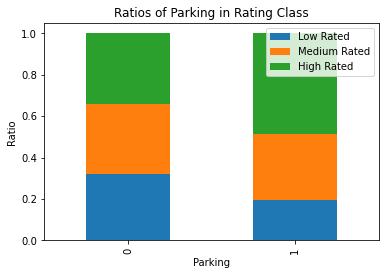

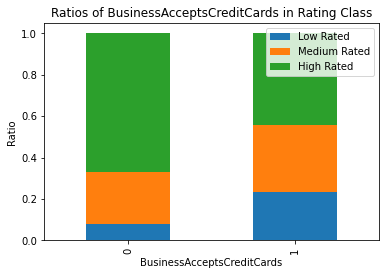

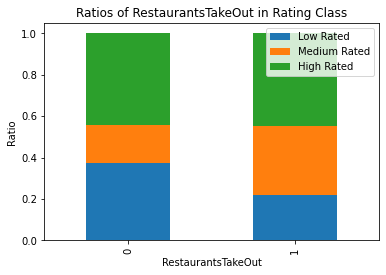

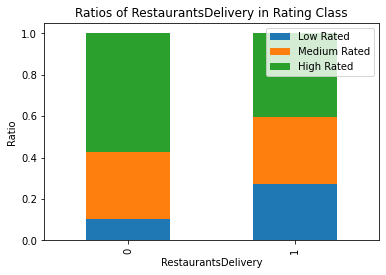

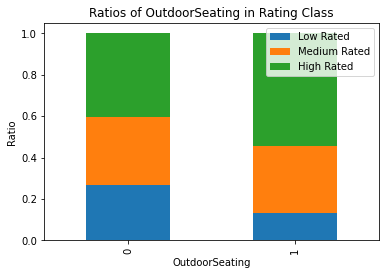

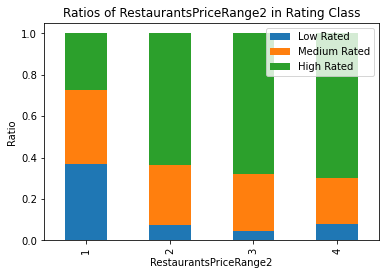

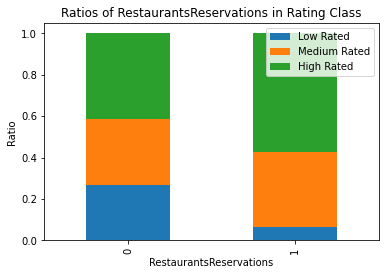

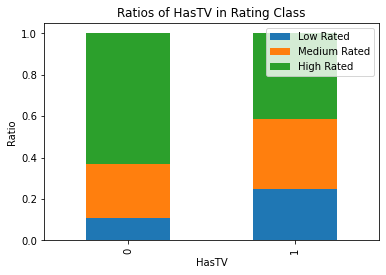

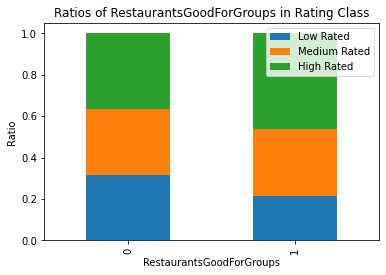

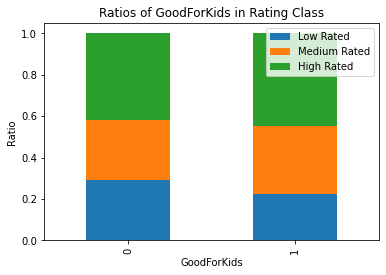

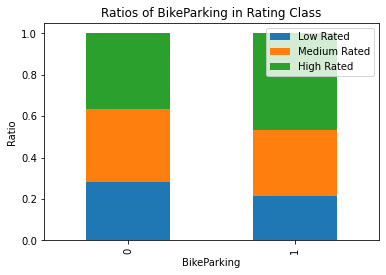

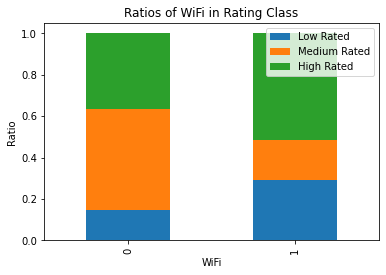

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

categories = ["Parking", "BusinessAcceptsCreditCards", "RestaurantsTakeOut", "RestaurantsDelivery",
              "OutdoorSeating", "RestaurantsPriceRange2", "RestaurantsReservations", "HasTV",
              "RestaurantsGoodForGroups", "GoodForKids", "BikeParking", "WiFi"]

# Mapping of rating classes to labels
rating_labels = {
    0: 'Low Rated',
    1: 'Medium Rated',
    2: 'High Rated'
}

for attribute in categories:
    # Assuming your dataframe is named 'finalDF'
    # Assuming Rating Class column is named 'Rating Class'
    # Assuming BusinessAcceptsCreditCards column is named 'BusinessAcceptsCreditCards'

    # Group the dataframe by Rating Class and attribute, and calculate the ratios
    grouped_df = finalDF.groupby(['Rating Class', attribute]).size().unstack('Rating Class')
    ratios_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

    # Plot bar plot
    ax = ratios_df.plot(kind='bar', stacked=True)

    # Set labels and title
    plt.xlabel(attribute)
    plt.ylabel('Ratio')
    plt.title('Ratios of ' + attribute + ' in Rating Class')

    # Map the rating class labels to the legend
    handles, labels = ax.get_legend_handles_labels()
    labels = [rating_labels[int(label)] for label in labels]
    ax.legend(handles, labels)

    # Save the chart as a PNG file with the attribute name as the file name
    file_name = attribute + '.png'
    plt.savefig(file_name)

    # Display the plot
    plt.show()


City with the most number of restaurants: Philadelphia


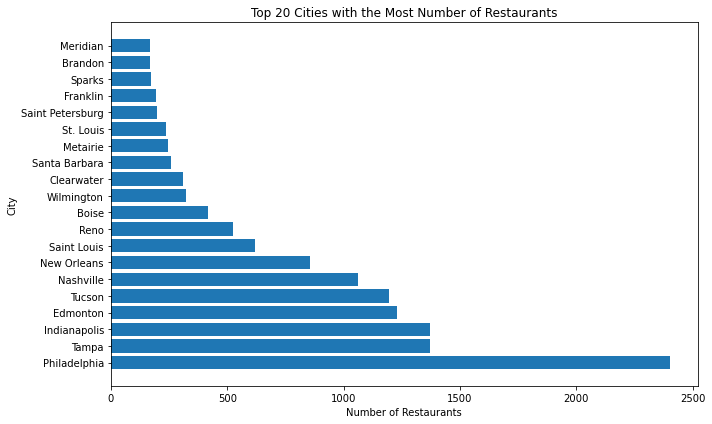

In [61]:
# Filter the DataFrame to include only restaurants
restaurants_df = df2[df2['categories'].apply(isRestaurant)]

# Group the filtered DataFrame by city and count the number of restaurants
restaurant_counts = restaurants_df.groupby('city').size()

# Sort the cities based on the number of restaurants in descending order
sorted_cities = restaurant_counts.sort_values(ascending=False)

# Retrieve the city with the highest count
city_with_most_restaurants = sorted_cities.index[0]

print("City with the most number of restaurants:", city_with_most_restaurants)
# Get the top 20 cities with the most number of restaurants
top_20_cities = sorted_cities.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_20_cities.index, top_20_cities.values)
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.title('Top 20 Cities with the Most Number of Restaurants')
plt.tight_layout()
plt.show()

#### Old Code